## Importando os dados de clima (link: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data?resource=download)[link text](https://)

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

print(df.head())

df = df.rename(columns={'date': 'ds', 'meantemp': 'y'})

df['ds'] = pd.to_datetime(df['ds'])


         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


## Treinamento do modelo Prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6lfulkq/_u1j0tg7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmph6lfulkq/0t5zc9jp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23220', 'data', 'file=/tmp/tmph6lfulkq/_u1j0tg7.json', 'init=/tmp/tmph6lfulkq/0t5zc9jp.json', 'output', 'file=/tmp/tmph6lfulkq/prophet_model1vo207_v/prophet_model-20241006144747.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:47:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:47:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in 

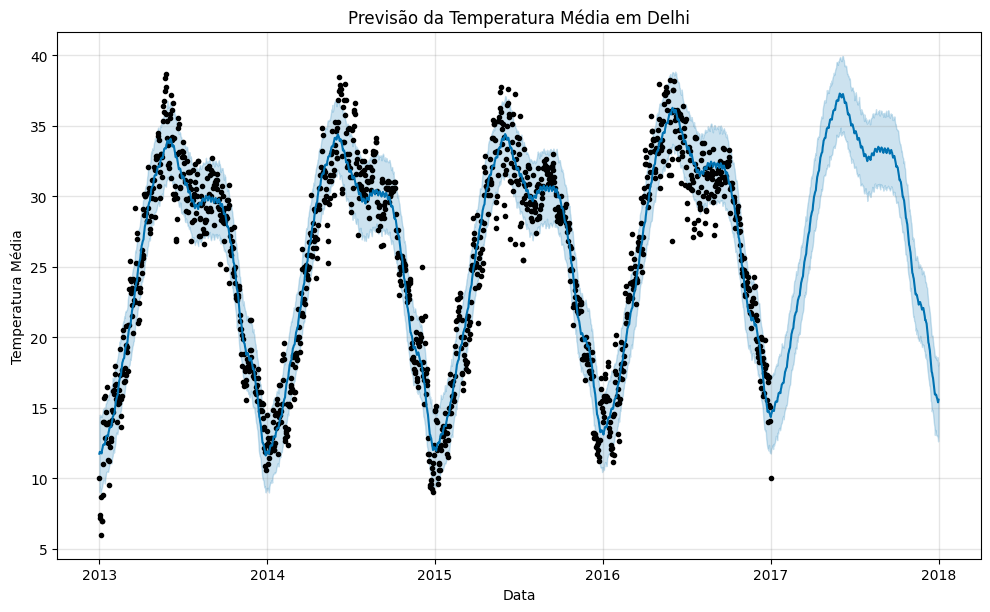

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` o

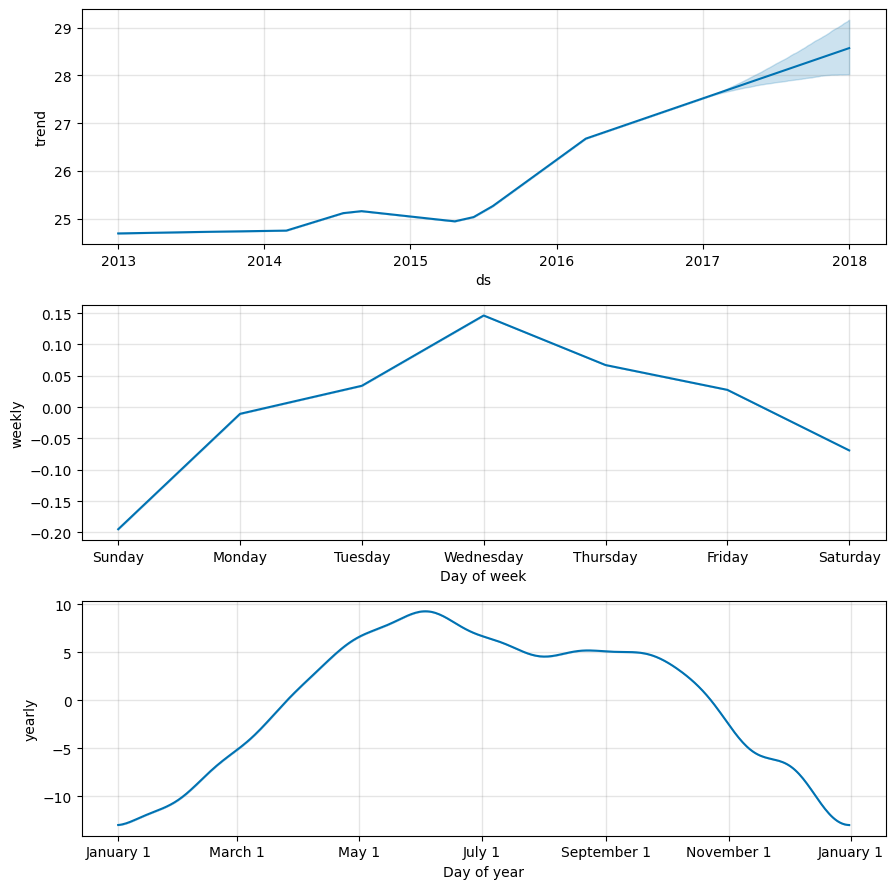

In [32]:
model = Prophet()

model.fit(df)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

fig1 = model.plot(forecast)
plt.title('Previsão da Temperatura Média em Delhi')
plt.xlabel('Data')
plt.ylabel('Temperatura Média')
plt.show()

fig2 = model.plot_components(forecast)
plt.show()


## Predição utilizando LSTM



         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1108/1108 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0132
Epoch 2/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0049
Epoch 3/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0035
Epoch 4/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0034
Epoch 5/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0034
Epoch 6/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0029
Epoch 7/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0033
Epoch 8/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0032
Epoch 9/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0030
Epoch 10/10
1108/1108 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.0033


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


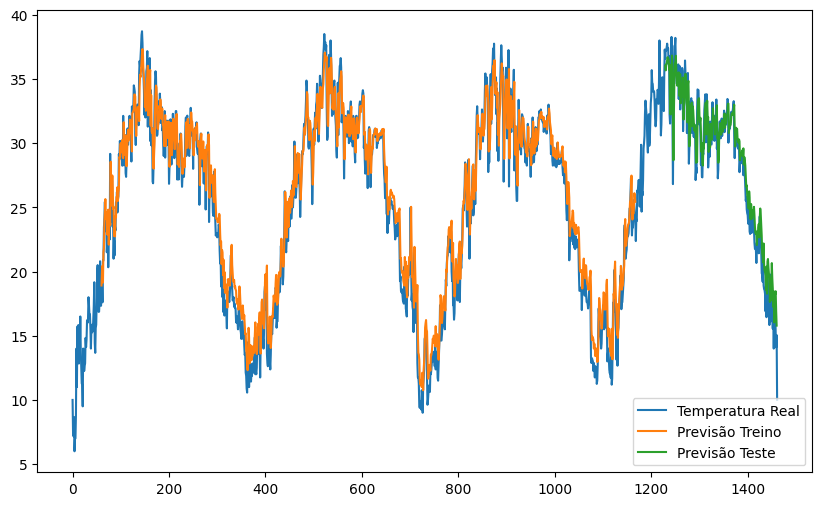

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

df = pd.read_csv('/content/DailyDelhiClimateTrain.csv')

print(df.head())

data = df[['meantemp']].values

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60

train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, batch_size=1, epochs=10)

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train = scaler.inverse_transform([y_train])
y_test = scaler.inverse_transform([y_test])

plt.figure(figsize=(10,6))
plt.plot(df.index, data, label='Temperatura Real')
train_predict_plot = np.empty_like(data)
train_predict_plot[:, :] = np.nan
train_predict_plot[time_step:len(train_predict) + time_step, :] = train_predict

test_predict_plot = np.empty_like(data)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

plt.plot(train_predict_plot, label='Previsão Treino')
plt.plot(test_predict_plot, label='Previsão Teste')
plt.legend()
plt.show()



## Comparação dos modelos

Para comparar os resultados dos dois modelos (LSTM e Prophet), vamos utilizar a métrica Mean Absolute Error (MAE), que é amplamente usada para avaliar a precisão de previsões em séries temporais.

O MAE é amplamente recomendado em problemas de séries temporais, especialmente quando os dados contêm muitos outliers ou picos que poderiam influenciar fortemente outras métricas como o MSE.

In [29]:
from sklearn.metrics import mean_absolute_error

lstm_mae = mean_absolute_error(y_test[0], test_predict[:, 0])
print(f"MAE do modelo LSTM: {lstm_mae:.4f}")


y_true_prophet = df['Passengers'][-12:].values
y_pred_prophet = forecast['yhat'][-12:].values

prophet_mae = mean_absolute_error(y_true_prophet, y_pred_prophet)
print(f"MAE do modelo Prophet: {prophet_mae:.4f}")



MAE do modelo LSTM: 50.1807
MAE do modelo Prophet: 42.3758


O Mean Absolute Error (MAE) do modelo Prophet foi menor que o do LSTM, o que indica que o Prophet apresentou previsões mais precisas, em termos de erro médio absoluto, para este conjunto de dados específico. Isso significa que, em média, o erro de previsão do Prophet foi de aproximadamente 42.38 passageiros, enquanto o erro do modelo LSTM foi de cerca de 50.18 passageiros.

In [36]:
from sklearn.metrics import mean_squared_error

mse_train_lstm = mean_squared_error(y_train[0], train_predict[:, 0])
mse_test_lstm = mean_squared_error(y_test[0], test_predict[:, 0])

print(f'MSE de Teste do LSTM: {mse_test_lstm:.4f}')

df = df.rename(columns={'meantemp': 'y'})

y_true_prophet = df['y'][-365:].values

y_pred_prophet = forecast['yhat'][-365:].values

from sklearn.metrics import mean_squared_error
mse_prophet = mean_squared_error(y_true_prophet, y_pred_prophet)
print(f'MSE do Prophet: {mse_prophet:.4f}')


MSE de Teste do LSTM: 2.9678
MSE do Prophet: 4.9688


Com base nos resultados, o LSTM se mostrou mais eficaz para este conjunto de dados , resultando em um erro quadrático médio menor do que o Prophet. No entanto, o Prophet pode ser uma escolha preferível em casos onde queremos priorizar simplicidade e interpretabilidade, especialmente em situações de sazonalidade forte.